In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Using  'MobileNet'

In [15]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
# from tensorflow.keras.applications import imagenet_utils
from keras.applications.mobilenet import preprocess_input, decode_predictions


from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [9]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [10]:
mobile = tf.keras.applications.mobilenet.MobileNet()

### Getting image ready for tests

In [11]:
def prepare_image(file):
    
    img_path = 'data/MobileNet-samples/'
    
    # resizing image and setting image path     
    img = image.load_img( img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

# 'preprocess_input' will scale the image's RGB value to a scale of (-1 to 1)

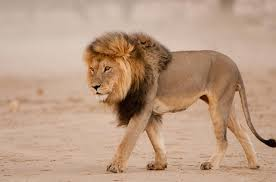

In [12]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.jpeg', width=300, height=200)

In [17]:
preprocessed_image = prepare_image('1.jpeg')
predictions = mobile.predict(preprocessed_image)

results = decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 4us/step


[[('n02129165', 'lion', 0.9963213),
  ('n02091831', 'Saluki', 0.0034992883),
  ('n02437312', 'Arabian_camel', 5.6045796e-05),
  ('n02088094', 'Afghan_hound', 4.7717247e-05),
  ('n02108551', 'Tibetan_mastiff', 1.08310915e-05)]]

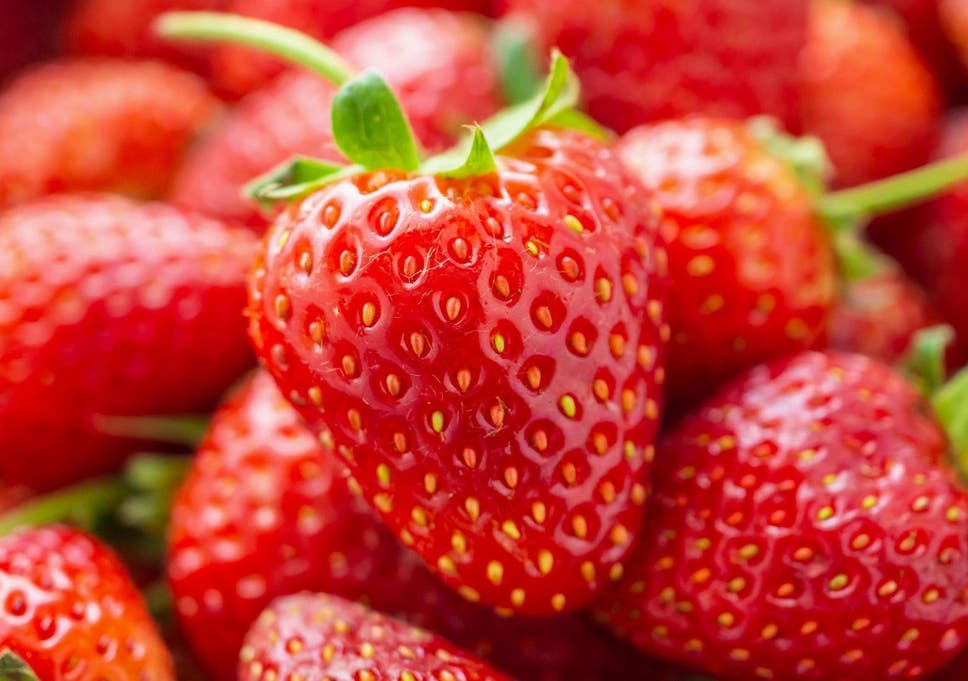

In [18]:
Image(filename='data/MobileNet-samples/2.jpg', width=300, height=200)

In [21]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)

results = decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.99973613),
  ('n07753592', 'banana', 5.0949056e-05),
  ('n07742313', 'Granny_Smith', 3.5563968e-05),
  ('n07747607', 'orange', 2.2073917e-05),
  ('n02776631', 'bakery', 1.581447e-05)]]

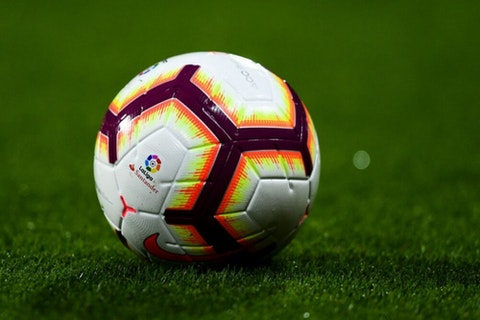

In [22]:
Image(filename='data/MobileNet-samples/3.jpg', width=300, height=200)

In [23]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)

results = decode_predictions(predictions)
results

[[('n04254680', 'soccer_ball', 0.9998628),
  ('n03379051', 'football_helmet', 0.000119565455),
  ('n04118538', 'rugby_ball', 7.4642226e-06),
  ('n03935335', 'piggy_bank', 6.5406552e-06),
  ('n03445777', 'golf_ball', 1.0532432e-06)]]

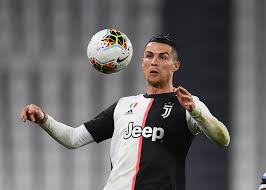

In [24]:
Image(filename='data/MobileNet-samples/4.jpeg', width=300, height=200)

In [25]:
preprocessed_image = prepare_image('4.jpeg')
predictions = mobile.predict(preprocessed_image)

results = decode_predictions(predictions)
results

[[('n02799071', 'baseball', 0.59210294),
  ('n04540053', 'volleyball', 0.14855167),
  ('n09835506', 'ballplayer', 0.04996219),
  ('n02777292', 'balance_beam', 0.04751208),
  ('n04409515', 'tennis_ball', 0.019016245)]]